# LISUM09, Week 10 EDA and recommendation
## Name: Laâroussi Saâdeddine
## Mail : laar.saad.eddine@gmail.com
## Country : Morocco

## Importing libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import date, timedelta
import seaborn as sns

## Reading data

In [2]:
df_s = pd.read_csv('bank.csv',delimiter=";")

In [3]:
df= pd.read_csv('bank-full.csv',delimiter=";")

## Information on data and values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
for column in df.columns:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

age: 

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
 

job: 

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
 

marital: 

['divorced' 'married' 'single']
 

education: 

['primary' 'secondary' 'tertiary' 'unknown']
 

default: 

['no' 'yes']
 

balance: 

[ -8019  -6847  -4057 ...  81204  98417 102127]
 

housing: 

['no' 'yes']
 

loan: 

['no' 'yes']
 

contact: 

['cellular' 'telephone' 'unknown']
 

day: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
 

month: 

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
 

duration: 

[   0    1    2 ... 3785 3881 4918]
 

campaign: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 1

## Number of values for each classification

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Checking for Null values and outliers

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.loc[df['pdays']==-1].count()[0]

36954

In [9]:
df.loc[df['previous']==0].count()[0]

36954

In [10]:
df.loc[df['previous']==0].loc[df['pdays']==-1].count()[0]

36954

For all entries that have a value of previous = 0, pdays is equal to -1, this means that the subject has never been contacted before

In [11]:
df.loc[df['previous']==0].loc[df['pdays']==-1]['y'].value_counts()

no     33570
yes     3384
Name: y, dtype: int64

<Figure size 720x72 with 0 Axes>

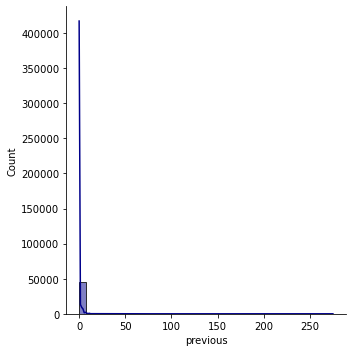

<Figure size 720x72 with 0 Axes>

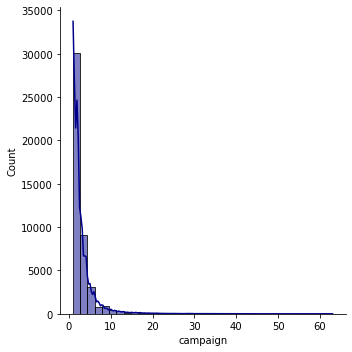

<Figure size 720x72 with 0 Axes>

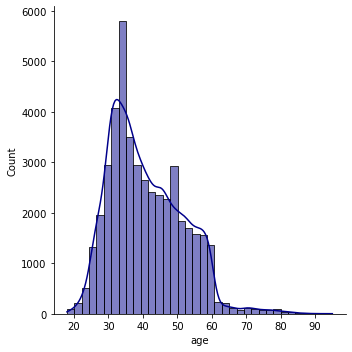

<Figure size 720x72 with 0 Axes>

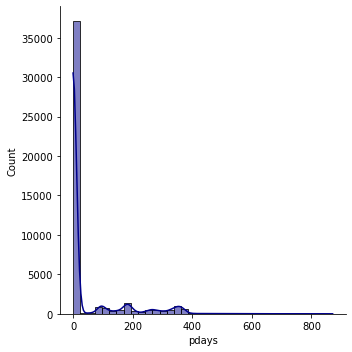

<Figure size 720x72 with 0 Axes>

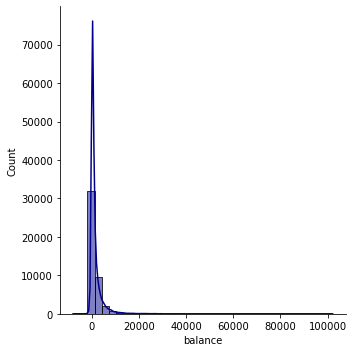

<Figure size 720x72 with 0 Axes>

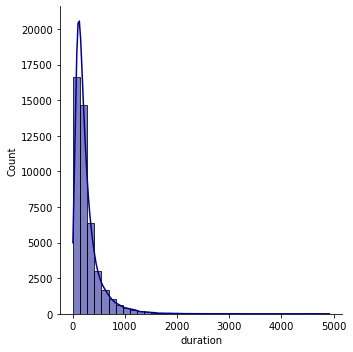

In [12]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.displot(data=df, x=column, kde=True, 
             bins=int(180/5), color = 'darkblue')

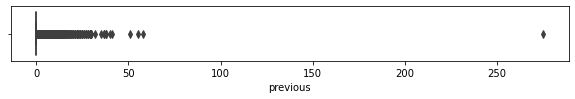

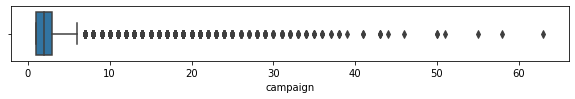

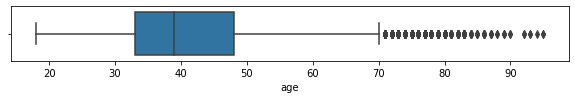

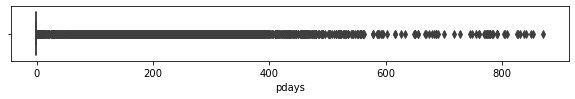

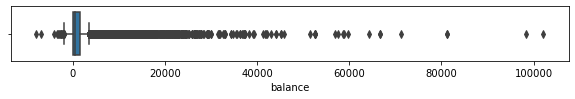

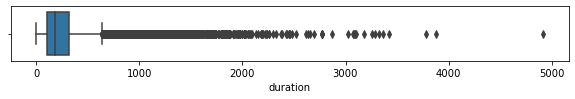

In [13]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df, x=column)

## Testing of removing "null" data

Assuming that previous = 0 and pdays = -1 is the null value we will try to remove them to see the impact on data

In [14]:
df2 = df.loc[df['previous']!=0]

In [15]:
df2.shape

(8257, 17)

In [16]:
df2['y'].value_counts()

no     6352
yes    1905
Name: y, dtype: int64

In [17]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


<Figure size 720x72 with 0 Axes>

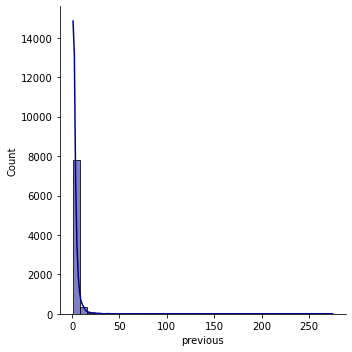

<Figure size 720x72 with 0 Axes>

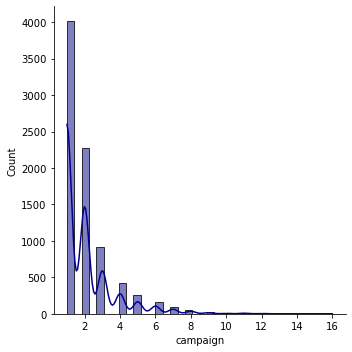

<Figure size 720x72 with 0 Axes>

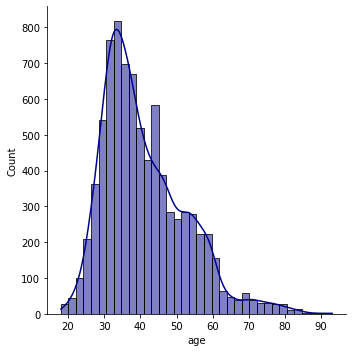

<Figure size 720x72 with 0 Axes>

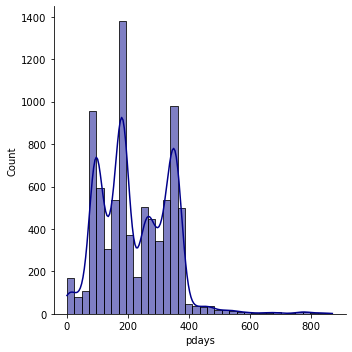

<Figure size 720x72 with 0 Axes>

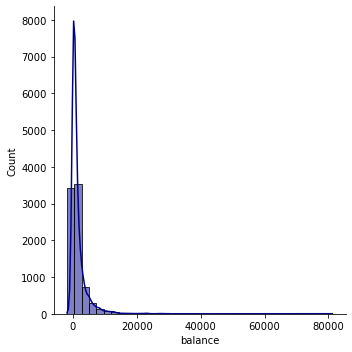

<Figure size 720x72 with 0 Axes>

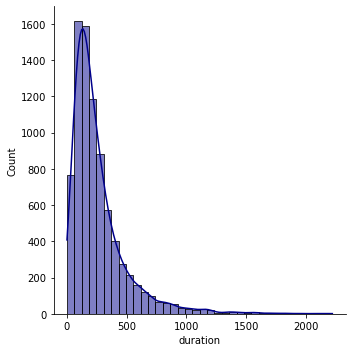

In [18]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.displot(data=df2, x=column, kde=True, 
             bins=int(180/5), color = 'darkblue')

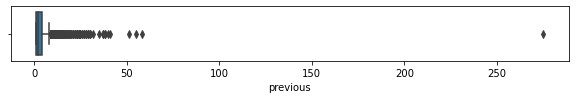

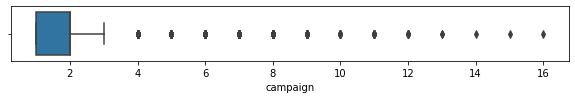

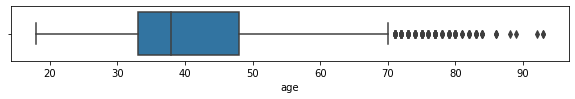

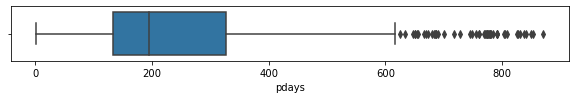

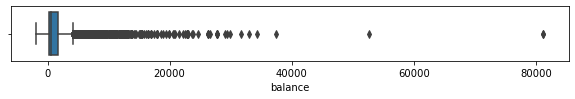

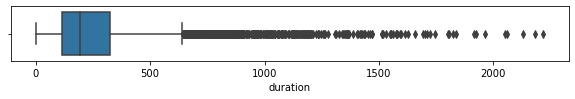

In [19]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df2, x=column)

Data seems to have less outliers however since this is a classification problem we need to keep all the data. <br>
In order to fix these outliers the numeric values are going to be categorized into different categories

## Categorizing data

### Age category

In [20]:
for column in ['age']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

age: 

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
 



Trying to balance data:

In [21]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [26]:
df.loc[(df['age']<=33),'age group']="<=33"
df.loc[(df['age']>33) & (df['age']<=39),'age group']="33-39"
df.loc[(df['age']>39) & (df['age']<=48),'age group']="39-48"
df.loc[(df['age']>48),'age group']=">48"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>48
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,39-48
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<=33
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,39-48
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<=33


### Balance category

In [27]:
for column in ['balance']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

balance: 

[ -8019  -6847  -4057 ...  81204  98417 102127]
 



In [28]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [33]:
df.loc[(df['balance']<=72),'balance group']="<=72"
df.loc[(df['balance']>72) & (df['balance']<=448),'balance group']="72-448"
df.loc[(df['balance']>448) & (df['balance']<=1428),'balance group']="448-1428"
df.loc[(df['balance']>1428),'balance group']=">1428"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age group,balance group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>48,>1428
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,39-48,<=72
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<=33,<=72
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,39-48,>1428
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<=33,<=72


### Duration category

In [34]:
for column in ['duration']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

duration: 

[   0    1    2 ... 3785 3881 4918]
 



In [35]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [36]:
df.loc[(df['duration']<=103),'duration time']="<=103"
df.loc[(df['duration']>103) & (df['duration']<=180),'duration time']="103-180"
df.loc[(df['duration']>180) & (df['duration']<=319),'duration time']="180-319"
df.loc[(df['duration']>319),'duration time']=">319"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age group,balance group,duration time
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>48,>1428,180-319
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,39-48,<=72,103-180
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<=33,<=72,<=103
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,39-48,>1428,<=103
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<=33,<=72,180-319


### Campaign category

In [37]:
for column in ['campaign']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

campaign: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 43 44 46 50 51 55 58 63]
 



In [38]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [39]:
df.loc[(df['campaign']<=1),'campaign #']="1"
df.loc[(df['campaign']==2) ,'campaign #']="2"
df.loc[(df['campaign']>=3),'campaign #']=">3"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age group,balance group,duration time,campaign #
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,>48,>1428,180-319,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,39-48,<=72,103-180,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,<=33,<=72,<=103,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,39-48,>1428,<=103,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,<=33,<=72,180-319,1


### pdays category

In [40]:
for column in ['pdays','previous']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

pdays: 

[ -1   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 2

In [41]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [42]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

Since data that have previous = 0 has pdays = -1 are people that were never contacted, data will be seperated into two categories

In [43]:
df.loc[(df['previous']==0),'contacted']='no'
df.loc[(df['previous']!=0) ,'contacted']='yes'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age group,balance group,duration time,campaign #,contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,>48,>1428,180-319,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,39-48,<=72,103-180,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,<=33,<=72,<=103,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,39-48,>1428,<=103,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,<=33,<=72,180-319,1,no


# EDA on data

In [44]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age group', 'balance group',
       'duration time', 'campaign #', 'contacted'],
      dtype='object')

In [45]:
df_eda = df[['age group','job','marital','education','default','balance group','housing','loan','contact','day','month','duration time','campaign #','contacted','poutcome','contacted','y']]
df_eda.head()

,age group,job,marital,education,default,balance group,housing,loan,contact,day,month,duration time,campaign #,contacted,poutcome,contacted,y
0,>48,management,married,tertiary,no,>1428,yes,no,unknown,5,may,180-319,1,no,unknown,no,no
1,39-48,technician,single,secondary,no,<=72,yes,no,unknown,5,may,103-180,1,no,unknown,no,no
2,<=33,entrepreneur,married,secondary,no,<=72,yes,yes,unknown,5,may,<=103,1,no,unknown,no,no
3,39-48,blue-collar,married,unknown,no,>1428,yes,no,unknown,5,may,<=103,1,no,unknown,no,no
4,<=33,unknown,single,unknown,no,<=72,no,no,unknown,5,may,180-319,1,no,unknown,no,no


In [66]:
save_path = save_path="Images/"

## Number of subscribers

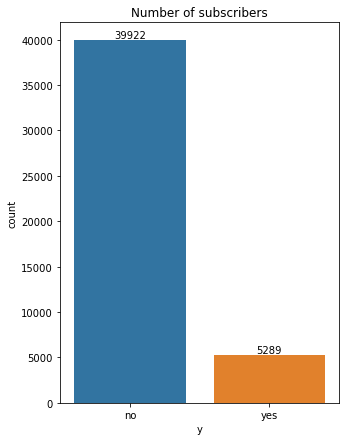

In [72]:
plt.figure(figsize=(5, 7))
ax =sns.countplot(x='y', data=df_eda)
ax.bar_label(ax.containers[0])
ax.set(title="Number of subscribers")
#plt.show()
plt.savefig(save_path+"Number of subscribers.png")

11% of the customers in the data chose to subscribe.

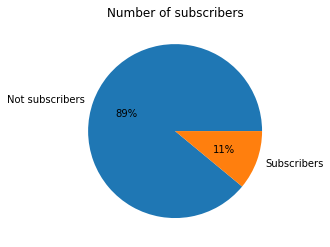

In [97]:
plt.pie([89,11],labels=['Not subscribers','Subscribers'], autopct='%.0f%%')
plt.title("Number of subscribers")
plt.savefig(save_path+"Number of subscribers pie.png")

## Subscriptions per age group

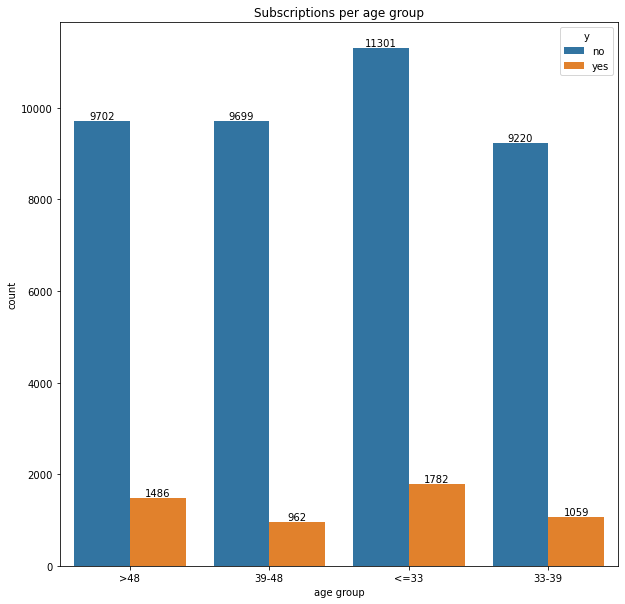

In [74]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='age group',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per age group")
#plt.show()
plt.savefig(save_path+"Subscriptions per age group.png")

- 33% of the customers that chose to subscribe are under 33.
- 28% of them are over 48.
- 20% are between 33-39
- 18% are between 39-48


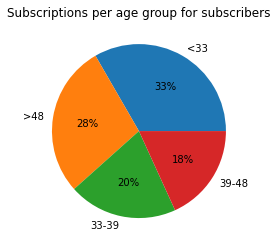

In [96]:
plt.pie([33,28,20,18],labels=['<33','>48','33-39','39-48'], autopct='%.0f%%')
plt.title("Subscriptions per age group for subscribers")
plt.savefig(save_path+"Subscriptions per age group subscribers.png")

## Subscribers per marital status

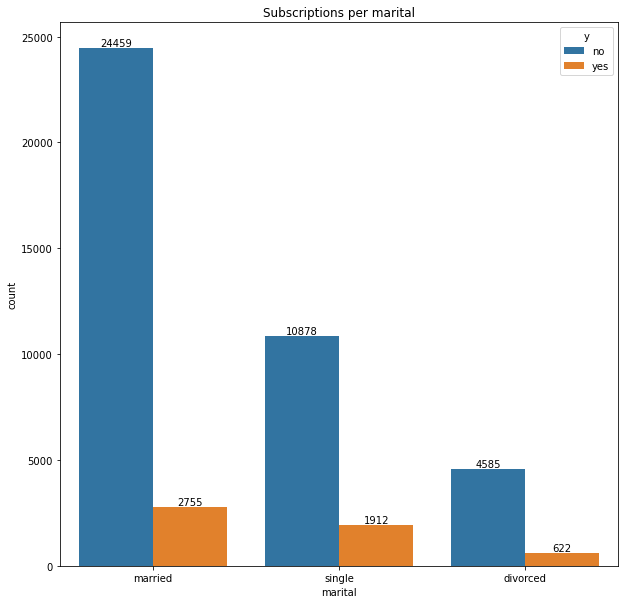

In [80]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='marital',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per marital")
#plt.show()
plt.savefig(save_path+"Subscriptions per marital status.png")

- 52% of subscribers are married.
- 36% of them are single.
- 11% are divorced.

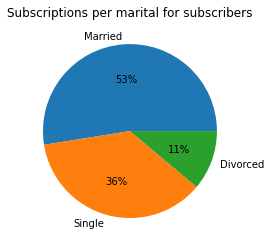

In [94]:
plt.pie([52,36,11],labels=['Married','Single','Divorced'], autopct='%.0f%%')
plt.title("Subscriptions per marital for subscribers")
plt.savefig(save_path+"Subscriptions per marital status subscribers.png")

## Subscribers per default

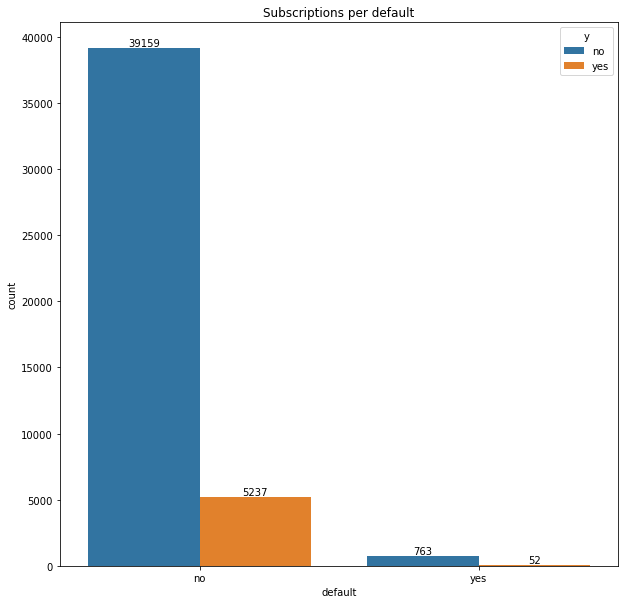

In [98]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='default',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per default")
#plt.show()
plt.savefig(save_path+"Subscriptions per default.png")

- 99% of subscribers do not have default credit

##  Subscribers per education

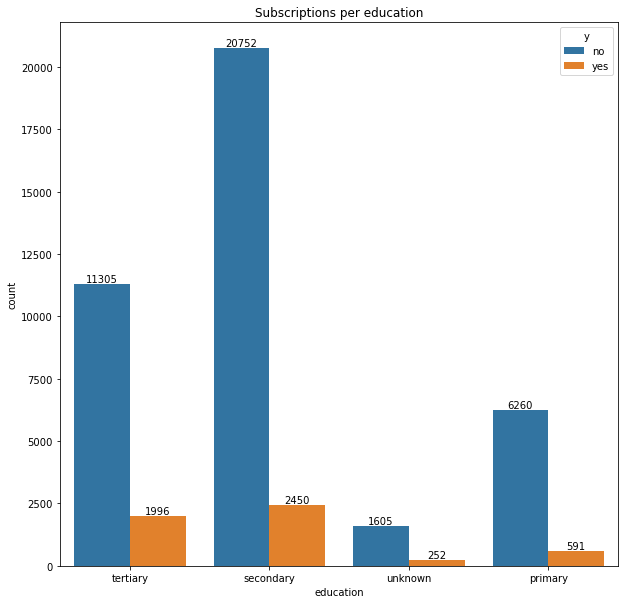

In [104]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='education',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per education")
plt.savefig(save_path+"Subscriptions per education.png")

- 46% of subscribers have secondary education.
- 37% of them have tertiary education.
- 11% have primary education
- 8% of subscribers education is unknown.


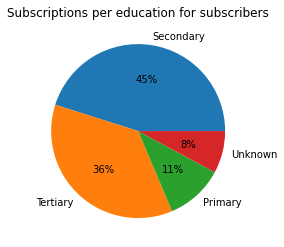

In [103]:
plt.pie([46,37,11,8],labels=['Secondary','Tertiary','Primary','Unknown'], autopct='%.0f%%')
plt.title("Subscriptions per education for subscribers")
plt.savefig(save_path+"Subscriptions per education subscribers.png")

## Subscribers per balance group

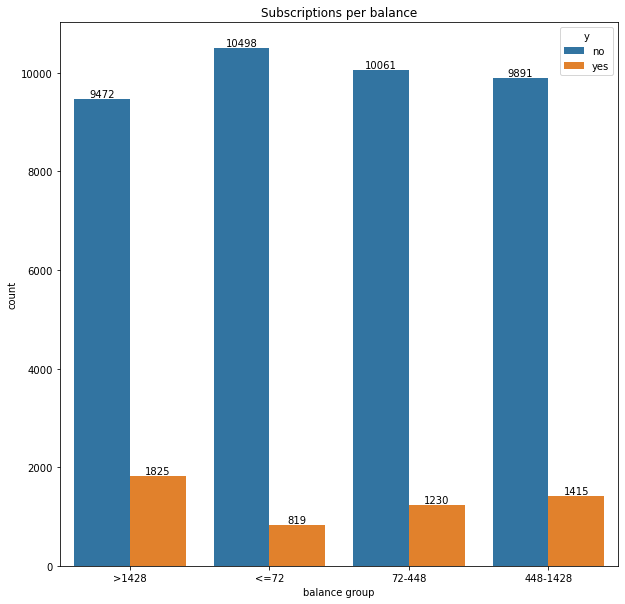

In [110]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='balance group',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per balance")
plt.savefig(save_path+"Subscriptions per balance group.png")

-	34% of subscribers have a balance above 1428.
-	26% of them have a balance between 448-1428.
-	23% have a balance between 72-448.
-	17% have a balance lower or equal than 72.

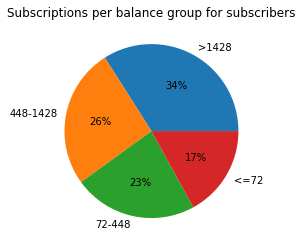

In [108]:
plt.pie([34,26,23,17],labels=['>1428','448-1428','72-448','<=72'], autopct='%.0f%%')
plt.title("Subscriptions per balance group for subscribers")
plt.savefig(save_path+"Subscriptions per balance group subscribers.png")

## Subscribers per housing status

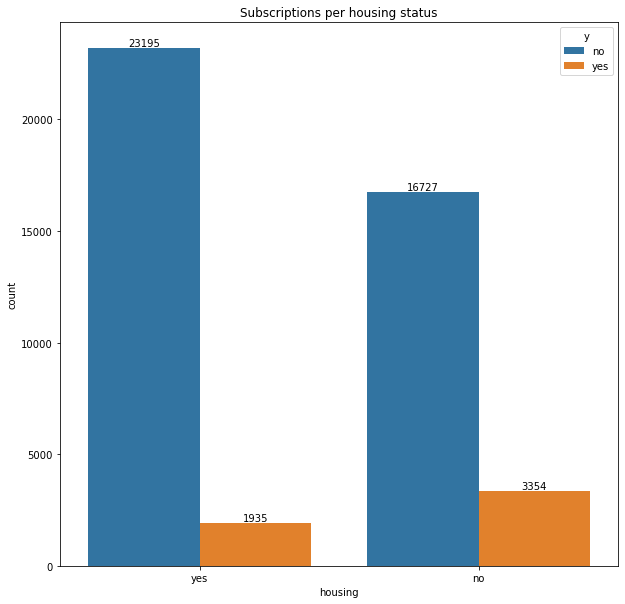

In [112]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='housing',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per housing status")
plt.savefig(save_path+"Subscriptions per housing.png")

-	63% of subscribers do not have a house.
-	37 of them have a house.


## Subscribers per loan status

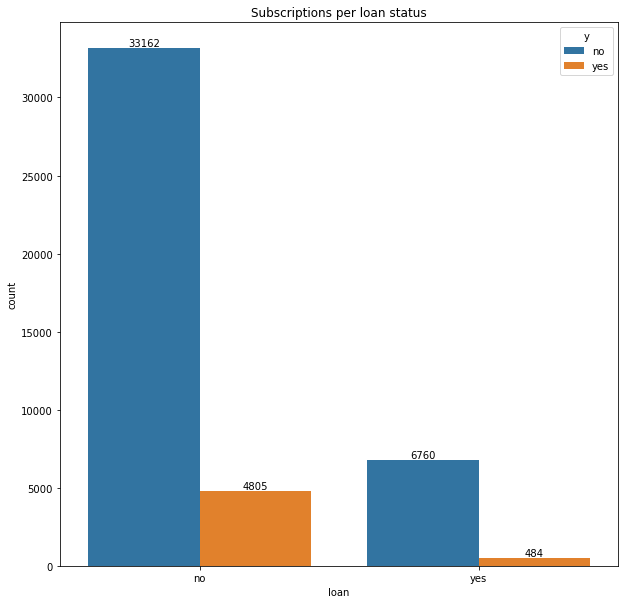

In [114]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='loan',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per loan status")
plt.savefig(save_path+"Subscriptions per loan status.png")

-	90% of subscribers do not have a loan status.
-	10% of them have one.


## Subscribers per contact mean

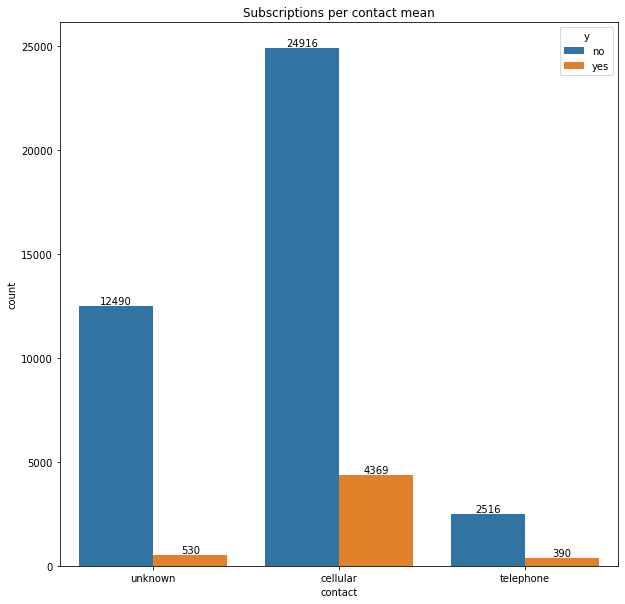

In [115]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='contact',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per contact mean")
plt.savefig(save_path+"Subscriptions per contact mean.png")

-	82% of subscribers were contacted via cellular.
-	10% of them were contact via unknown means.
-	8% were contacted via telephone.


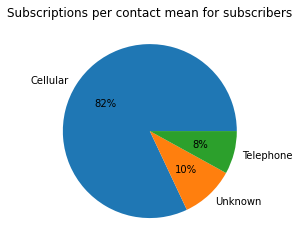

In [119]:
plt.pie([82,10,8],labels=['Cellular','Unknown','Telephone'], autopct='%.0f%%')
plt.title("Subscriptions per contact mean for subscribers")
plt.savefig(save_path+"Subscriptions per contact mean subscribers.png")

## Subscribers per duration time spent

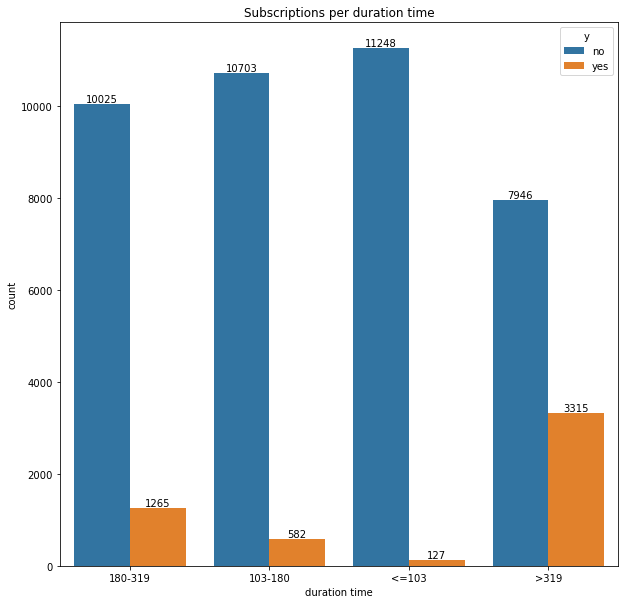

In [120]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='duration time',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscriptions per duration time")
plt.savefig(save_path+"Subscriptions per duration time.png")

-	63% of subscribers were contacted for a duration over 319 seconds.
-	24% of them for a duration between 180 and 319 seconds.
-	11% of them for a duration between 113 and 180 seconds.
-	2% of them for a duration less than 113 seconds.


## Month with most subscribers 

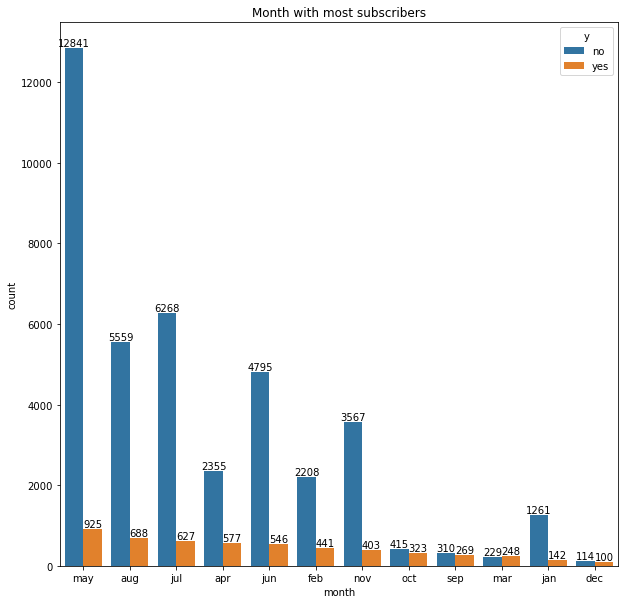

In [127]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='month',hue='y', data=df_eda, order = df_eda.loc[df_eda['y']=='yes']['month'].value_counts().index)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Month with most subscribers")
plt.savefig(save_path+"Month with most subscribers.png")

Months with most subscribers are : may, aug and july.

## Day with most subscribers

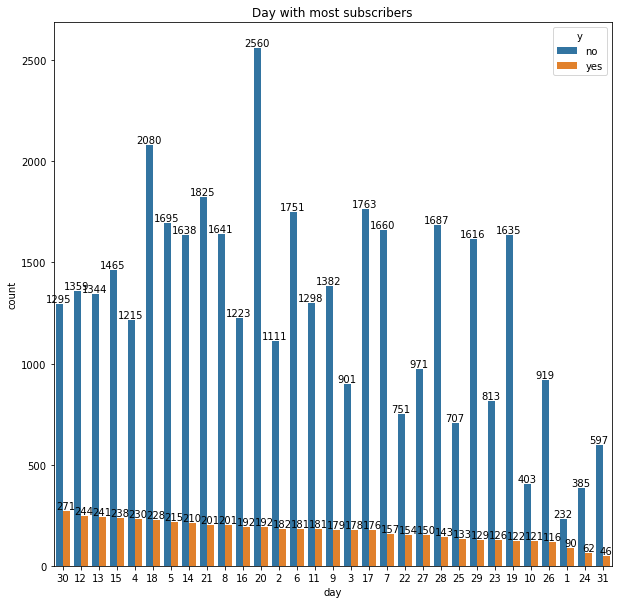

In [128]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='day',hue='y', data=df_eda, order = df_eda.loc[df_eda['y']=='yes']['day'].value_counts().index)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Day with most subscribers")
plt.savefig(save_path+"Day with most subscribers.png")

Day with most subscribers are : 30,12,13,15.

## Subscribers per campaign number

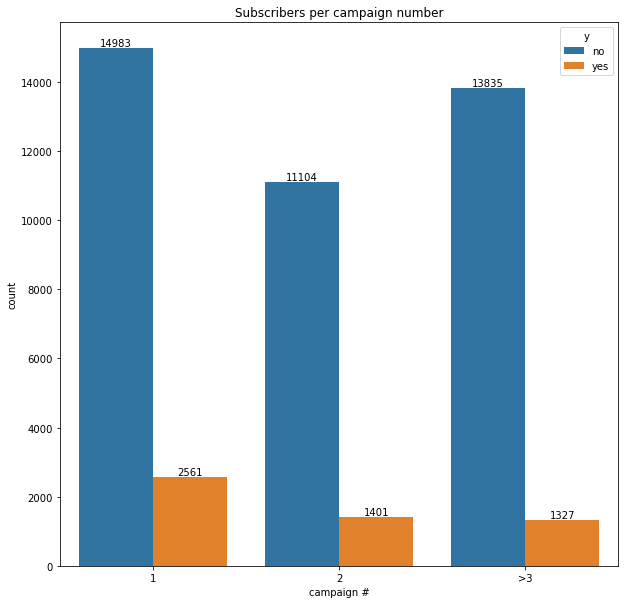

In [129]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='campaign #',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscribers per campaign number")
plt.savefig(save_path+"Subscribers per compaign number.png")

-	49% of subscribers were contacted 1 time only during this campaign.
-	26% of them were contacted 2 times.
-	25% were contacted more than 3 times.


## Subscribers per contact

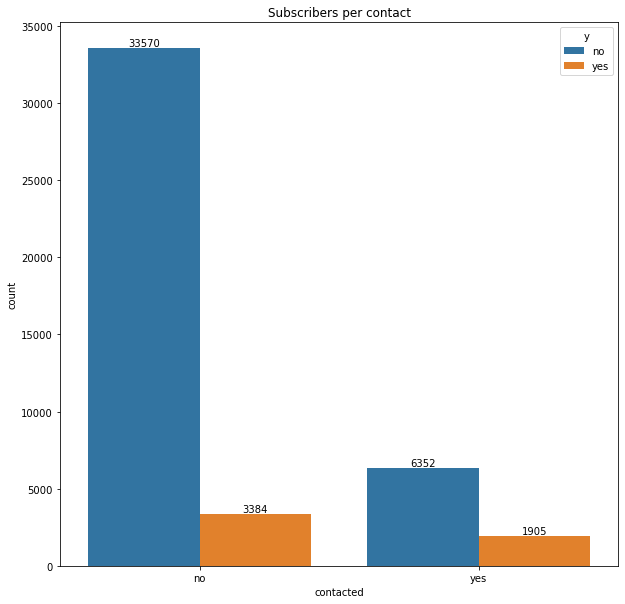

In [133]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='contacted', hue='y', data=df)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscribers per contact")
plt.savefig(save_path+"Subscribers per contact.png")

-	64% of subscribers were never contacted in any previous campaigns
-	36% were contacted in a previous campaign.


## Subscribers per outcome

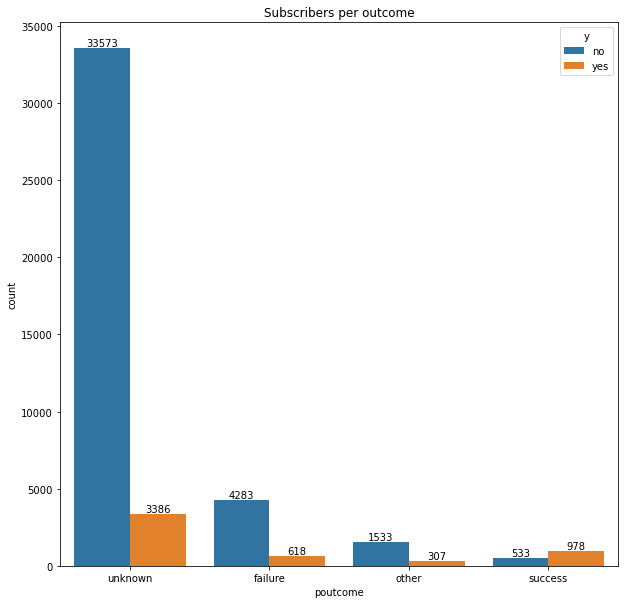

In [135]:
plt.figure(figsize=(10, 10))
ax =sns.countplot(x='poutcome',hue='y', data=df_eda)
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set(title="Subscribers per outcome")
plt.savefig(save_path+"Subscribers per outcome.png")

-	64% of subscribers outcome was unknown.
-	18% of the outcome was considered a success.
-	11% of the outcome was considered a failure.
-	7% of the outcome was classed as other.


## Final Recommendation

The bank should consider advertising to : 
-	People that are under 33.
-	Married people.
-	Customers that do not have a default credit.
-	Customers with at least a secondary education.
-	Customers with a balance higher than 1428.
-	Customers that do not own a house.
-	Customers without a loan. <br>
The bank should consider contacting their customers via cellular and spend at least 319 seconds contacting them. <br>
The bank should consider advertising during the months of May, August, and July. Either during the end of the months or the middle of the months.<br>
The bank should mainly focus on contacting customers one time and should prioritize customers that have never participated in a campaign.<br>
